In [1]:
global df_ventas, df_ventas_limpio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 2.- Obtención de datos

In [3]:
def obtencion_datos():
    global df_ventas, df_ventas_limpio
    df_ventas = pd.read_csv("./reporte_ventas.csv")
    df_ventas["fecha_pedido"] = pd.to_datetime(df_ventas["fecha_pedido"], format='%Y-%m-%d')
    df_ventas["fecha_envio"] = pd.to_datetime(df_ventas["fecha_envio"], format='%Y-%m-%d')
    df_ventas_limpio = df_ventas.drop_duplicates()
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio["nombre_cliente"] != "prueba"]
    df_ventas_limpio = df_ventas_limpio.dropna(subset=["nombre_cliente"])
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio["total_ganancia"] > 0]
    df_ventas_limpio.reset_index(inplace=True, drop=True)
    return df_ventas_limpio

In [4]:
obtencion_datos()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.0,123.22,1,123.22,25.88
7206,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.0,271.97,1,271.97,48.96
7207,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.0,140.15,5,700.75,94.60
7208,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.1,28.61,3,85.83,6.96


# 3.- Pregunta1 : ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

In [5]:
def pregunta_1():
    global df_ventas, df_ventas_limpio
    df_ventas_limpio_copia = df_ventas_limpio.copy()
    df_ventas_año = df_ventas_limpio_copia[["fecha_pedido", "total_venta"]]
    df_ventas_año["año"] = df_ventas_año["fecha_pedido"].dt.year
    df_ventas_año.drop("fecha_pedido", axis = 1, inplace = True)
    df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'})
    # Hallaremos el porcentaje de aumento de la ventas del año 2022, con respecto al 2021
    año_2021_venta_total=df_ventas_año.at[2021,"total_venta"]
    año_2022_venta_total=df_ventas_año.at[2022,"total_venta"]
    x = (((año_2022_venta_total - año_2021_venta_total) * 100) / año_2021_venta_total).round(2)
    # Visualizacion
    fig, ax = plt.subplots(figsize=(10,4))

    ejeX = df_ventas_año.index
    ejeY = df_ventas_año["total_venta"]
    colores = ["#CDDBF3","#CDDBF3","#CDDBF3","#0077b6"]
    barras = ax.bar(ejeX, ejeY, color=colores, width=0.8)

    #Titulo
    ax.set_title("Ventas totales por año\n(2019-2022)",fontsize=15,weight="bold",loc="left")

    # Desapareciendo los bordes de la imagen
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ahora haremos que no aparezca nada en el eje Y eliminando los ticks y sus valores
    ax.set_yticks([])

    # Para el eje X usaremos el ancho de las barras y lo divideremos entre 2 para que los años se posicionen en cada barra para cada barra en el conjuntos de barras haremos esto
    # recorrido.
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in barras])
    ax.set_xticklabels(ejeX)

    for bar in ax.patches:
        valor = bar.get_height()
        qtd = f'USD${valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
        ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom')
        ax.text(2022.5,15.1e5,"En el", fontsize=13)
        ax.text(2022.72,15.1e5,"  2022", fontsize=13,color="#0077b6", weight="bold")
        ax.text(2022.96,15.1e5,"   , las ventas", fontsize=13)
        ax.text(2022.5,14.3e5,"en el Supermercado subieron", fontsize=13)
        ax.text(2022.5,13.5e5,f"aproximadamente", fontsize=13)
        ax.text(2023.3,13.5e5,f"   {x}%", fontsize=13,color="#0077b6", weight="bold")
        ax.text(2022.5,12.5e5,"Comparado con el año anterior", fontsize=13)

C:\Users\DaNew\AppData\Local\Temp\ipykernel_7828\2194007222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_año["año"] = df_ventas_año["fecha_pedido"].dt.year
C:\Users\DaNew\AppData\Local\Temp\ipykernel_7828\2194007222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_año.drop("fecha_pedido", axis = 1, inplace = True)


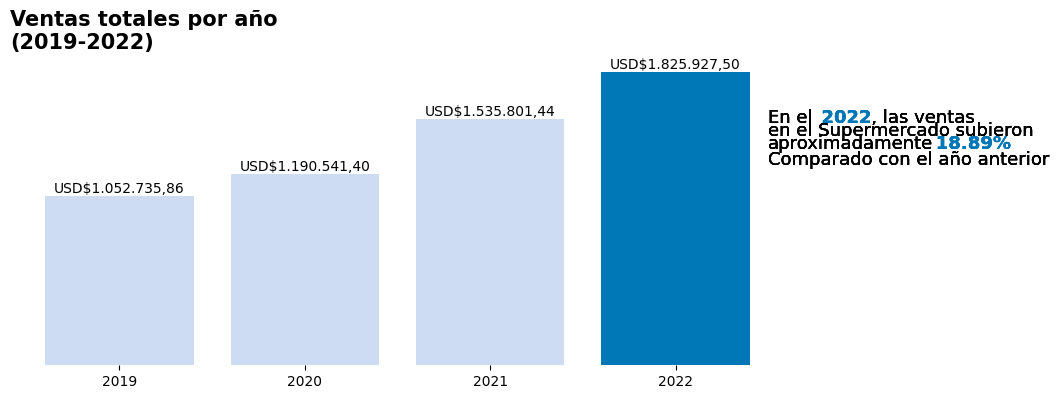

In [6]:
pregunta_1()

# 4.- Pregunta2 : ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

In [7]:
def pregunta_2():
    global df_ventas, df_ventas_limpio
    df_top_ganancias_copia = df_ventas_limpio.copy()
    df_top_ganancias = df_top_ganancias_copia[["tipo_producto","total_ganancia"]]
    df_top_ganancias = df_top_ganancias.groupby("tipo_producto").agg({"total_ganancia": "sum"})
    df_top_ganancias = df_top_ganancias.sort_values(by="total_ganancia", ascending= False)
    df_top_ganancias = df_top_ganancias.iloc[0:7]
    df_top_ganancias = df_top_ganancias.sort_values(by= "total_ganancia")
    x = str(int((df_top_ganancias.loc[["Bolsas de basura", "Detergente para ropas"],"total_ganancia"].sum())/1000))
    # parte 2 visualizacion
    fig, ax = plt.subplots(figsize=(10,4))
    ejeX = df_top_ganancias.index
    ejeY = df_top_ganancias["total_ganancia"]
    colores = ["#0C8040","#0C8040","#adb5bd","#0077b6","#0077b6","#0077b6","#0077b6"]
    ax.barh(ejeX, ejeY, color=colores, align='center')
    #Titulo
    ax.set_title("Top 7 productos con las mayor ganancia (2019-2022)",fontsize=15,weight="bold")
    #Quitando los bordes negros del grafico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Eliminando ticks del eje x
    ax.set_xticks([])
    for i,valor in enumerate(df_top_ganancias['total_ganancia']):
        qtd = f'USD${valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
        ax.text(valor,i,qtd, va='center', ha='right')
        ax.text(11.5e4,6.1,"Los datos indican que los 4 productos que generan", fontsize=12)
        ax.text(11.5e4,5.56,"mayor ganancia", fontsize=12,weight="bold")
        ax.text(13.8e4,5.56,"son del departamento de", fontsize=12)
        ax.text(17.05e4,5.56,"Electrónicos.", fontsize=12,color="#0077b6",weight="bold")
        ax.text(11.5e4,4.5,"Podemos notar tambien que el departamento de", fontsize=12)
        ax.text(11.5e4,4,"Productos de Limpieza", fontsize=12,color="#0C8040",weight="bold")
        ax.text(15e4,4,"tiene 2 productos con", fontsize=12)
        ax.text(11.5e4,3.5,"buena margen de ganancia, totalizando", fontsize=12)
        ax.text(16.5e4,3.5,f" ${x}mil", fontsize=12,weight="bold")
        ax.text(11.5e4,3,"durante el periodo analizado.", fontsize=12)
        

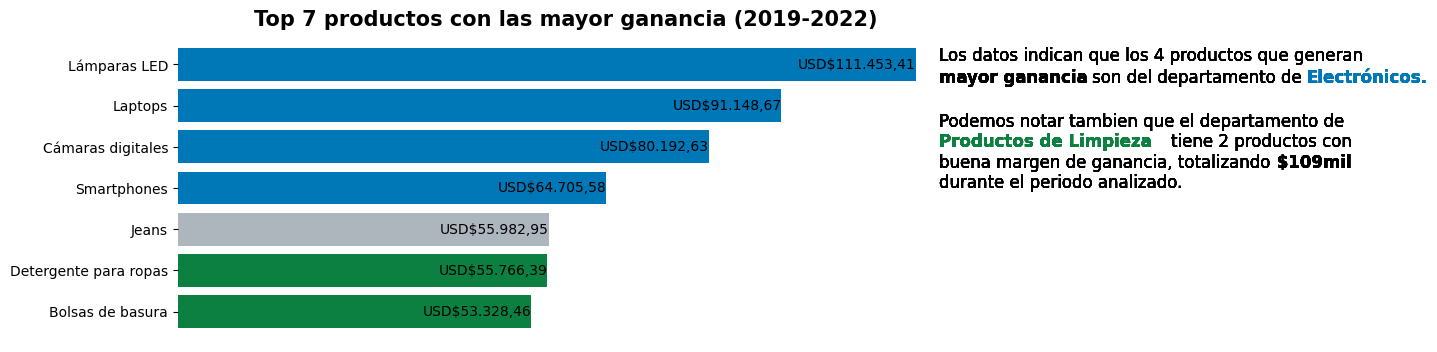

In [8]:
pregunta_2()

# 5.- Pregunta3 : Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

In [9]:
def pregunta_3():
    global df_ventas, df_ventas_limpio
    df_ventas_año_region_copia = df_ventas_limpio.copy()
    df_ventas_año_region = df_ventas_año_region_copia[["fecha_pedido","region","total_venta"]]
    df_ventas_año_region["año"] = df_ventas_año_region["fecha_pedido"].dt.year
    df_ventas_año_region.drop("fecha_pedido", axis = 1, inplace = True)
    # generando una tabla cruzada
    df_ventas_año_region = pd.crosstab(index = df_ventas_año_region["año"], columns = df_ventas_año_region["region"], values = df_ventas_año_region["total_venta"], aggfunc="sum")
    df_ventas_año_region = df_ventas_año_region[["Sureste","Noreste","Centro-Oeste","Norte","Sur"]]
    # Por ultimo hallaremos que porcentaje de ventas representa cada región y el mayor de ellos
    # Sumamos todas las ventas por región
    suma_ventas_region = df_ventas_año_region.sum()
    # Hallamos las suma de todas las ventas
    venta_total = suma_ventas_region.sum()
    # Ahora sacaremos el porcentaje por cada region
    sureste =  (suma_ventas_region["Sureste"]/venta_total)*100
    noreste = (suma_ventas_region["Noreste"]/venta_total)*100
    centro_oeste = (suma_ventas_region["Centro-Oeste"]/venta_total)*100
    norte = (suma_ventas_region["Norte"]/venta_total)*100
    sur = (suma_ventas_region["Sur"]/venta_total)*100
    # Ahora hallaremos hallaremos el porcentaje de ventas que representa la suma de las regiones centro-oeste, noreste y sureste
    x = (centro_oeste + noreste +sureste).round(2)
    # parte 2 visualizacion
    colores =['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)
    # Vamos a deshabilitar la visibilidad de los bordes negros.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Titulo
    ax.set_title("Ventas del Supermercado por región",fontsize=15,weight="bold",loc="left")
    # Subtitulo
    ax.text(-0.5,18.6e5,f"(2019-2022)",fontsize=12,weight="bold")
    # Eliminando la etiqueta del eje X
    ax.set_xlabel('')
    # Moviendo la leyenda generada
    ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))
    # Quitando los ticks de el ejeY
    ax.set_yticks([])
    # Eliminando la marca de los ticks en el eje x y colocaremos sus valores en horizontal
    plt.xticks(rotation='horizontal')
    ax.tick_params(axis='x', length=0)
    for container in ax.containers:
        # Los textos toman el valor de la altura de cada barra, y para mostrarlo en el formato de miles de divideremos este valor entre 1000 y lo convertiremos
        # en un entero, por ultimo añadiremos dentro del f-string una K la cual representa los miles es decir 900k significa novecientos mil (900.000)
        labels = [f'{int(bar.get_height()/1000)}K' for bar in container]
        ax.bar_label(container, label_type='center', labels=labels)
        ax.text(3.35,15.5e5,f"{x}%",fontsize=12, color="#0077b6",weight="bold")
        ax.text(3.35,14.2e5,"de las ventas en el Supermercado\nestán concentradas en las regiones",fontsize=12)
        ax.text(3.35,13.6e5,"Suereste, Noreste",fontsize=12,weight="bold")
        ax.text(3.965,13.6e5,"y",fontsize=12)
        ax.text(3.35,13e5,"Centro-Oeste",fontsize=12,weight="bold")
        ax.text(3.35,12.5e5,"desde el 2019.",fontsize=12)

C:\Users\DaNew\AppData\Local\Temp\ipykernel_7828\1527424530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_año_region["año"] = df_ventas_año_region["fecha_pedido"].dt.year
C:\Users\DaNew\AppData\Local\Temp\ipykernel_7828\1527424530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_año_region.drop("fecha_pedido", axis = 1, inplace = True)


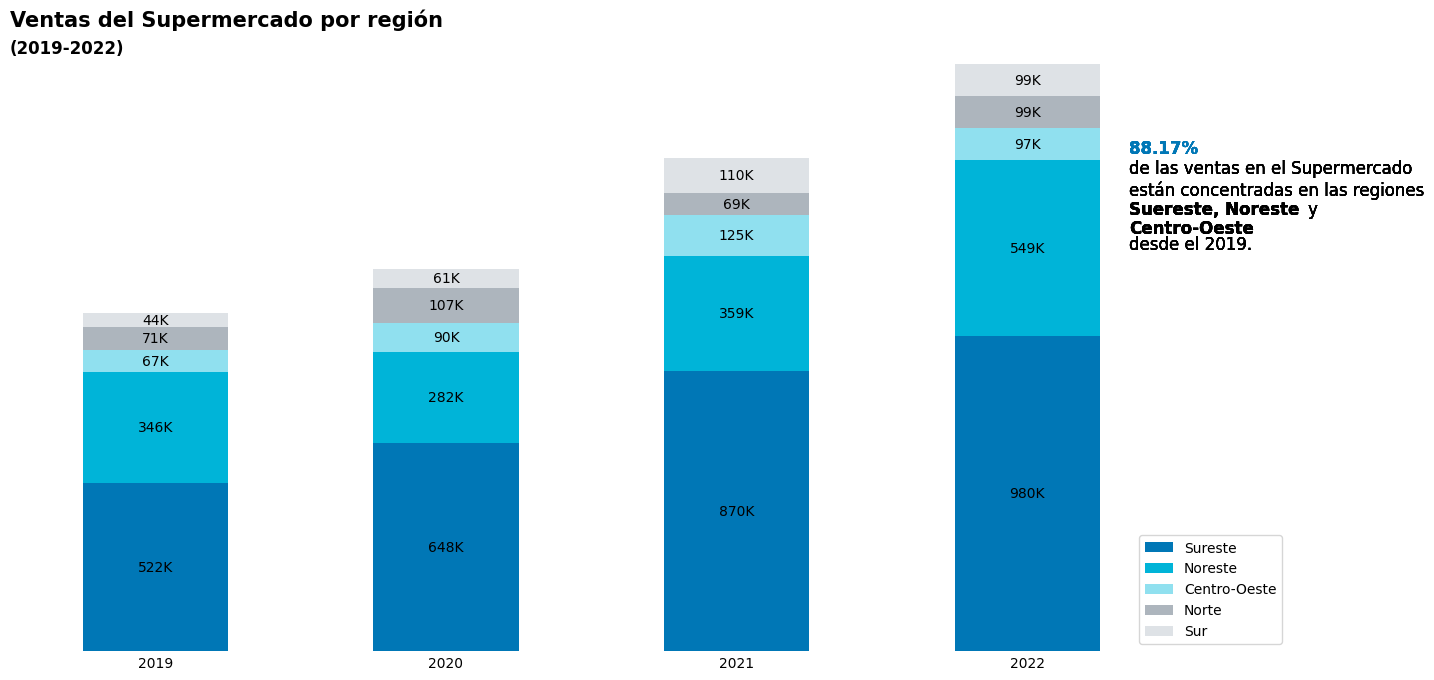

In [10]:
pregunta_3()

# 6.- Pregunta4 : ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

In [11]:
def pregunta_4():
    global df_ventas, df_ventas_limpio
    df_modo_envio_copia = df_ventas_limpio.copy()
    df_modo_envio = df_modo_envio_copia[["modo_envio", "segmento_cliente"]]
    df_modo_envio = pd.crosstab(df_modo_envio["modo_envio"], df_modo_envio["segmento_cliente"]).sort_values("B2B")
    suma = (df_modo_envio.sum()).sum()
    porcentaje_entrega_estandar_total = (((df_modo_envio.loc['Entrega estándar','B2B'] + df_modo_envio.loc['Entrega estándar','B2C']) / suma) * 100).round(2)
    # parte 2 visualizacion
    fig, ax = plt.subplots(figsize=(10,4))
    ejeX= df_modo_envio.index
    eje1Y= df_modo_envio["B2B"]
    eje2Y= df_modo_envio["B2C"]
    colores=['#0077b6','#CDDBF3']
    ax.barh(ejeX, eje1Y, color=colores[0])
    ax.barh(ejeX, eje2Y, left=eje1Y, color=colores[1])
    ax.set_title("Método de envío más utilizado por los clientes B2B/B2C (2019-2022)",fontsize=12,weight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    for container in ax.containers:
        ax.bar_label(container,label_type='center', weight="bold")
        ax.text(46e2,2,"El método de entrega preferido por los clientes B2B/B2C\nen el perido de tiempo (2019-2022), es el método\n'Entrega estándar' y representa el",fontsize=12)
        ax.text(62.7e2,2,f"{porcentaje_entrega_estandar_total}% de los pedidos",fontsize=12,weight="bold")
        ax.text(46e2,1.75,"lo que indica que no hay diferencia en los segmentos.",fontsize=12)
        ax.text(0.2e2,3.45,"B2B|",fontsize=10,weight="bold", color ='#0077b6')
        ax.text(2.32e2,3.45,"B2C",fontsize=10,weight="bold",color ='#C4D2E9')

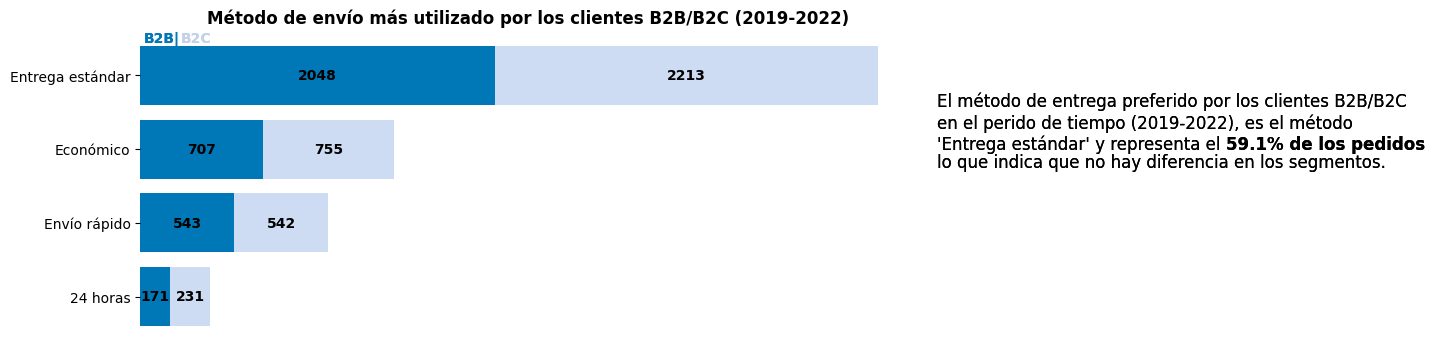

In [12]:
pregunta_4()

# 7.- Pregunta5 : ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

In [13]:
def pregunta_5():
    global df_ventas, df_ventas_limpio
    df_ventas_sp = df_ventas_limpio.copy()
    df_ventas_sp = df_ventas_sp[df_ventas_sp['estado'] == 'São Paulo']
    df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]
    df_ventas_sp.set_index('fecha_pedido', inplace=True)
    df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
    df_ventas_sp = (df_ventas_sp/1000).round(2)
    # parte 2 visualizacion
    fig, ax = plt.subplots(figsize=(14,4))
    lista =[False]*3+[True]+[False]*3+[True]+[False]*3+[True]+[False]*3+[True]
    ejeX = df_ventas_sp.index
    ejeY = df_ventas_sp["total_venta"]
    ejeX2 = "|             2019           |              2020            |              2021            |             2022            |"
    ax.plot(ejeX,ejeY,marker="o",markevery=lista)
    ax.set_yticks([])
    x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
    ax.set_xticks(df_ventas_sp.index)
    ax.set_xticklabels(x_labels, ha="center")
    ax.set_xlabel(ejeX2, fontsize=16.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(True)
    ax.set_title("Ventas por trimestre en el estado de São Paulo\nDe 2019 a 2022(en miles de dólares)",fontsize=15,weight="bold",loc="left")
    for i in range(3, len(df_ventas_sp["total_venta"]), 4):
        valor = str(df_ventas_sp["total_venta"][i])
        ax.text(ax.get_xticks()[i], df_ventas_sp["total_venta"][i], f"  ${valor}mil (4to Trimestre)",weight="bold",color="#005F91")
        ax.text(19.38e3,150,f"Podemos observar el crecimiento de las ventas en intervalos trimestrales. En el 4to\ntrimestre de cada año se genera un pico en las ventas, lo que indica que en esta\népoca es cuando los clientes compran más en el supermercado. Puede deberse a\nmucho factores, cobro de bonos, épocas de fiestas, promociones de temporada\nentre otro factores que pueden incentivar al cliente a gastar al final de cada año", fontsize=12)

C:\Users\DaNew\AppData\Local\Temp\ipykernel_7828\3388911851.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor = str(df_ventas_sp["total_venta"][i])
C:\Users\DaNew\AppData\Local\Temp\ipykernel_7828\3388911851.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(ax.get_xticks()[i], df_ventas_sp["total_venta"][i], f"  ${valor}mil (4to Trimestre)",weight="bold",color="#005F91")


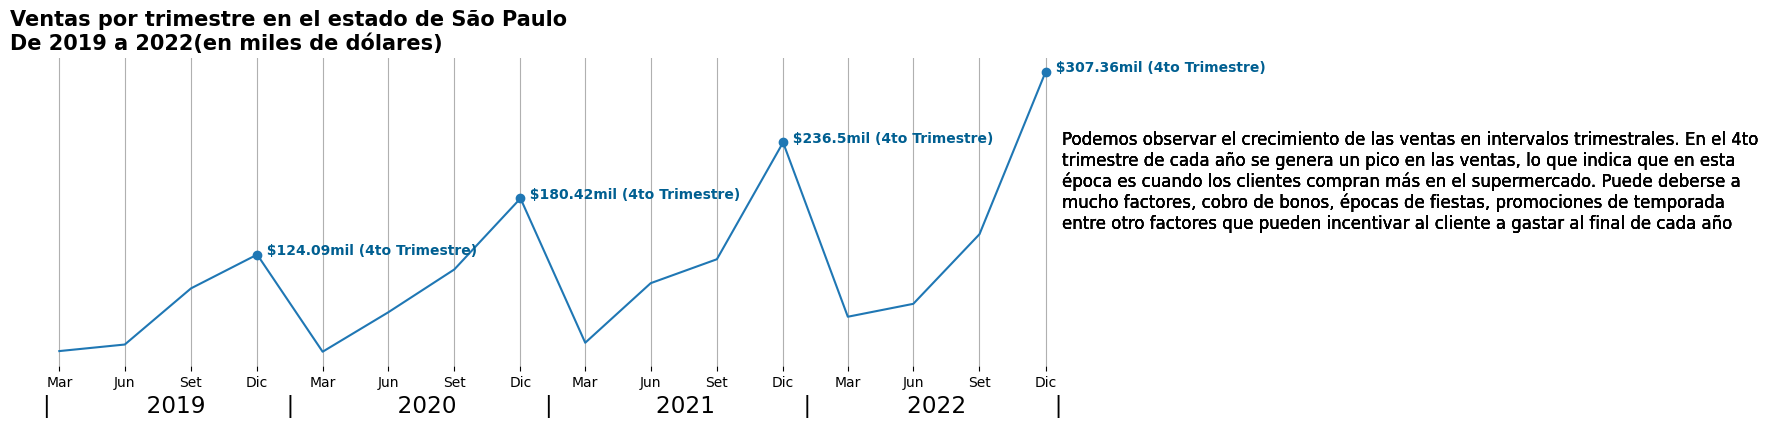

In [14]:
pregunta_5()